In [1]:
import pandas as pd
import numpy as np;
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("CKD_one_hot_encoded_dataset.csv")
df.head()

,Pt_ID,LatestAge,Gender,Ethnicity7,Ethnicity4,Smoking,Smoking3,MeanSBP,MeanDBP,MinSBP,...,RAASi_percentdosechange_2cat,RAASi_Vlast_maxdosevsnil,Tertiarycare_added,Primarycare_added,Tertiarycare_Any,Primarycare_Any,Ter_or_Pricare,Ter_andOR_Pricare,Diab_n_uACR,Diabetes_incl_hba1c_n_uACR
0,Z1000027,72,2,3,3,2,0,133.500000,65.500000,130.0,...,2.0,1.0,0,8,0,1,1,2,2,2
1,Z1000396,79,2,1,1,4,1,128.000000,63.600000,124.0,...,2.0,0.0,0,21,0,1,1,2,1,1
2,Z1000636,92,2,1,1,2,0,NaN,NaN,NaN,...,2.0,0.0,0,12,0,1,1,2,4,4
3,Z1001119,57,2,1,1,1,1,139.608696,79.782609,130.0,...,NaN,NaN,19,52,1,1,2,3,4,4
4,Z1001525,77,2,1,1,2,0,142.200000,68.800000,127.0,...,2.0,0.0,0,42,0,1,1,2,3,3


In [3]:
df.shape

(30397, 99)

In [4]:
df.columns

Index(['Pt_ID', 'LatestAge', 'Gender', 'Ethnicity7', 'Ethnicity4', 'Smoking',
       'Smoking3', 'MeanSBP', 'MeanDBP', 'MinSBP', 'MinDBP', 'MaxSBP',
       'MaxDBP', 'MeanSBP_less110', 'MeanBMI', 'Visits_NUH', 'Visits_AH',
       'Visits_NTFGH', 'Visits_BBK_OPS', 'Visits_BP_OPS', 'Visits_CCK_OPS',
       'Visits_Clem_OPS', 'Visits_Jur_OPS', 'Visits_Pioneer_OPS',
       'Visits_QT_OPS', 'No_of_visits', 'No.Admits', 'Adm_Days', 'Diabetes',
       'Diabetes_incl_hba1c', 'Heart_dz', 'Stroke', 'PVD', 'AKI_Ever', 'RAASi',
       'nsMRA', 'sMRA', 'SGLT2i', 'Latest_E', 'Metformin', 'Latest_F',
       'Statins', 'Latest_G', 'ESAs', 'Latest_H', 'Hba1c_mean',
       'Potassium_mean', 'Potassium_max', 'Potassium_min',
       'Potassium_max_greater5.0', 'Potassium_max_greater5.5', 'eGFR_mean',
       'eGFR_V1', 'eGFR_Vlast', 'eGFRdecline', 'eGFR_mean_catless30',
       'eGFR_mean_catless45', 'Cr_mean', 'Cr_V1', 'Cr_Vlast', 'uACR_mean',
       'uACR_mean_yesno', 'Albumin_mean', 'Bicarb_mean', 'Bicar

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30397 entries, 0 to 30396
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Pt_ID                                30397 non-null  object 
 1   LatestAge                            30397 non-null  int64  
 2   Gender                               30397 non-null  int64  
 3   Ethnicity7                           30397 non-null  int64  
 4   Ethnicity4                           30397 non-null  int64  
 5   Smoking                              30397 non-null  int64  
 6   Smoking3                             30397 non-null  int64  
 7   MeanSBP                              28760 non-null  float64
 8   MeanDBP                              28760 non-null  float64
 9   MinSBP                               28760 non-null  float64
 10  MinDBP                               28760 non-null  float64
 11  MaxSBP                      

In [6]:
# check duplicate value
df.duplicated().sum()

0

In [7]:
# check missing values in eGFR_mean
df['eGFR_mean'].isna().sum()

7830

In [8]:
# replace the 999 to 3 in smoking3
df["Smoking3"].value_counts()

df["Smoking3"] = df["Smoking3"].replace(999,3)
df

,Pt_ID,LatestAge,Gender,Ethnicity7,Ethnicity4,Smoking,Smoking3,MeanSBP,MeanDBP,MinSBP,...,RAASi_percentdosechange_2cat,RAASi_Vlast_maxdosevsnil,Tertiarycare_added,Primarycare_added,Tertiarycare_Any,Primarycare_Any,Ter_or_Pricare,Ter_andOR_Pricare,Diab_n_uACR,Diabetes_incl_hba1c_n_uACR
0,Z1000027,72,2,3,3,2,0,133.500000,65.500000,130.0,...,2.0,1.0,0,8,0,1,1,2,2,2
1,Z1000396,79,2,1,1,4,1,128.000000,63.600000,124.0,...,2.0,0.0,0,21,0,1,1,2,1,1
2,Z1000636,92,2,1,1,2,0,NaN,NaN,NaN,...,2.0,0.0,0,12,0,1,1,2,4,4
3,Z1001119,57,2,1,1,1,1,139.608696,79.782609,130.0,...,NaN,NaN,19,52,1,1,2,3,4,4
4,Z1001525,77,2,1,1,2,0,142.200000,68.800000,127.0,...,2.0,0.0,0,42,0,1,1,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30392,Z999132,68,1,1,1,2,0,130.000000,91.000000,130.0,...,NaN,NaN,0,12,0,1,1,2,3,3
30393,Z999221,70,1,1,1,2,0,131.363636,70.909091,109.0,...,2.0,0.0,0,31,0,1,1,2,2,2
30394,Z99931,84,1,1,1,1,1,141.500000,68.500000,134.0,...,NaN,NaN,0,16,0,1,1,2,1,1
30395,Z99969,69,1,1,1,2,0,155.466667,78.666667,151.0,...,2.0,0.0,32,0,1,0,1,1,2,2


In [9]:
# check Gender whether if same as KFRE_gen
len(df[df["Gender"] == df["KFRE_gen"]]) # both are same value, drop KFRE_age

30397

In [10]:
# check latestAge whether if same as KFRE_age
len(df[df["LatestAge"] == df["KFRE_age"]]) # both are same value, drop KFRE_age

30397

In [11]:
# del the columns without value
df.drop(columns = 
        ['Ethnicity7',
         'Smoking',
         'MinSBP', 
         'MinDBP', 
         'MaxSBP',
         'MaxDBP', 
         'MeanSBP_less110',
         'Latest_E', 
         'Latest_G',
         'Latest_H',
         'Latest_F', 
         'Potassium_max', 
         'Potassium_min',
         'Potassium_max_greater5.0', 
         'Potassium_max_greater5.5',
         'RAASi_status',
         'uACR_mean_yesno',
         'Bicarb_less22',
         'Visits_NUH',
         'Visits_BP_OPS',
         'Visits_AH',
         'Visits_NTFGH',
         'Visits_BBK_OPS',
         'Visits_CCK_OPS',
         'Visits_Clem_OPS',
         'Visits_Jur_OPS',
         'Visits_Pioneer_OPS',
         'Visits_QT_OPS',
         'No_of_visits',
         'No.Admits',
         'Adm_Days','RAASi_totaldose_V1', 
         'RAASi_totaldosemg_V1', 
         'RAASi_percentmaxdose_V1',
         'RAASi_totaldose_Vlast', 
         'RAASi_totaldosemg_Vlast',
         'RAASi_percentmaxdose_Vlast', 
         'RAASi_status',
         'RAASi_percentmaxdose_Vlast_Category', 
         'RAASi_percentdosechange',
         'RAASi_percentdosechange_category', 
         'RAASi_percentdosechange_2cat',
         'RAASi_Vlast_maxdosevsnil', 
         'Tertiarycare_added', 
         'Primarycare_added',
         'Tertiarycare_Any', 
         'Primarycare_Any', 
         'Ter_or_Pricare',
         'Ter_andOR_Pricare',
         'Diabetes_incl_hba1c',
         'Diab_n_uACR', 
         'Diabetes_incl_hba1c_n_uACR',
         'KFRESEA_5yrs', 
         'KFRE_age', 
         'KFRE_gen', 
         'KFRE_eGFR',
         'KFRE_uACR_mgg', 
         'KFRE_uACR_mgmmol', 
         'uACR_mean_yesno',
         'RAASi_date_V1',
         "RAASi_date_Vlast",
         'eGFR_mean_catless30',
         "eGFR_mean_catless45", 
         'Phos_mean'
        ], inplace = True)


In [12]:
print(df.shape)
df.columns
df.info()

(30397, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30397 entries, 0 to 30396
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pt_ID           30397 non-null  object 
 1   LatestAge       30397 non-null  int64  
 2   Gender          30397 non-null  int64  
 3   Ethnicity4      30397 non-null  int64  
 4   Smoking3        30397 non-null  int64  
 5   MeanSBP         28760 non-null  float64
 6   MeanDBP         28760 non-null  float64
 7   MeanBMI         14659 non-null  float64
 8   Diabetes        30397 non-null  int64  
 9   Heart_dz        30397 non-null  int64  
 10  Stroke          30397 non-null  int64  
 11  PVD             30397 non-null  int64  
 12  AKI_Ever        30397 non-null  int64  
 13  RAASi           30397 non-null  int64  
 14  nsMRA           30397 non-null  int64  
 15  sMRA            30397 non-null  int64  
 16  SGLT2i          30397 non-null  int64  
 17  Metformin       303

In [13]:
# check the missing value of eGFR and drop from dataset
df = df.dropna(subset = ["eGFR_mean"], axis = 0)
df.shape

(22567, 37)

In [14]:
# no. of CKD patient
print("stage1:", len(df[df["eGFR_mean"] >= 90])) # stage 1
print("stage2:", len(df[(df["eGFR_mean"] >= 60) & (df["eGFR_mean"] <= 89.9)])) # stage 2
print("stage 3:", len(df[(df["eGFR_mean"] >= 30) & (df["eGFR_mean"] <= 59.9)])) # stage 3
print("stage 4:",len(df[(df["eGFR_mean"] >= 15) & (df["eGFR_mean"] <=29.9)])) # stage 4
print("stage 5:",len(df[df["eGFR_mean"] < 15])) # stage 5

stage1: 691
stage2: 3334
stage 3: 15265
stage 4: 2421
stage 5: 856


In [15]:
def classified_CKD_stages (eGFR_mean_values):
    output = []
    for value in eGFR_mean_values:
        if value >=90 : 
            output.append(1) # stage 1 = 1
        elif ((value >= 60) & (value <= 89.9)) :
            output.append(2)# stage 2 = 2
        elif ((value >= 30) & (value <= 59.9)) :
            output.append(3)# stage 3 = 3
        elif ((value >= 15) & (value <= 29.9)) :
            output.append(4)# stage 4 = 4
        else:
            output.append(5) # stage 5 = 5
    return output

df["CKD_stages"] = classified_CKD_stages(df['eGFR_mean'])
df.head()

,Pt_ID,LatestAge,Gender,Ethnicity4,Smoking3,MeanSBP,MeanDBP,MeanBMI,Diabetes,Heart_dz,...,Cr_Vlast,uACR_mean,Albumin_mean,Bicarb_mean,Calcium_mean,iPTH_mean,Hb_mean,Sodium_mean,LDL_mean,CKD_stages
1,Z1000396,79,2,1,1,128.000000,63.600000,NaN,1,1,...,107.0,44.300000,NaN,NaN,NaN,NaN,10.65,140.00,NaN,3
2,Z1000636,92,2,1,0,NaN,NaN,NaN,0,1,...,103.0,NaN,NaN,NaN,NaN,NaN,NaN,140.00,1.740,3
3,Z1001119,57,2,1,1,139.608696,79.782609,41.707895,0,0,...,288.0,NaN,NaN,21.0,2.25,NaN,13.50,139.60,3.275,4
4,Z1001525,77,2,1,0,142.200000,68.800000,NaN,0,0,...,82.0,9.866667,48.0,NaN,NaN,NaN,10.20,140.50,3.230,3
5,Z1001539,75,2,1,0,154.333333,69.666667,27.514762,0,0,...,108.0,11.250000,44.0,23.0,2.42,7.1,11.10,139.75,NaN,3


In [16]:
# drop stage 1
df = df[df["CKD_stages"] != 1]
df.shape

(21876, 38)

# Remove those feature are missing values> 50%

In [17]:
# checking missing value
missing_values_per_feature = {}
missing_values =[]
for column in df.columns:
    missing_values_per_feature[column] = df[column].isna().sum()

missing_values_per_feature # missing eGFR values = 7830

{'Pt_ID': 0,
 'LatestAge': 0,
 'Gender': 0,
 'Ethnicity4': 0,
 'Smoking3': 0,
 'MeanSBP': 667,
 'MeanDBP': 667,
 'MeanBMI': 11422,
 'Diabetes': 0,
 'Heart_dz': 0,
 'Stroke': 0,
 'PVD': 0,
 'AKI_Ever': 0,
 'RAASi': 0,
 'nsMRA': 0,
 'sMRA': 0,
 'SGLT2i': 0,
 'Metformin': 0,
 'Statins': 0,
 'ESAs': 0,
 'Hba1c_mean': 7687,
 'Potassium_mean': 7202,
 'eGFR_mean': 0,
 'eGFR_V1': 0,
 'eGFR_Vlast': 0,
 'eGFRdecline': 0,
 'Cr_mean': 18,
 'Cr_V1': 18,
 'Cr_Vlast': 18,
 'uACR_mean': 7990,
 'Albumin_mean': 16909,
 'Bicarb_mean': 18227,
 'Calcium_mean': 18449,
 'iPTH_mean': 20708,
 'Hb_mean': 10873,
 'Sodium_mean': 2177,
 'LDL_mean': 13717,
 'CKD_stages': 0}

In [18]:
# features with more than 50% of missing data were exluded

df.drop(["MeanBMI","Albumin_mean","Bicarb_mean","Calcium_mean","iPTH_mean","LDL_mean"], axis = 1, inplace = True)
df.shape

(21876, 32)

In [19]:
print(df.shape)
df.describe().T

(21876, 32)


,count,mean,std,min,25%,50%,75%,max
LatestAge,21876.0,73.049643,10.833426,21.000000,67.000000,74.00,81.000000,115.000000
Gender,21876.0,1.425535,0.494435,1.000000,1.000000,1.00,2.000000,2.000000
Ethnicity4,21876.0,1.438380,0.830668,1.000000,1.000000,1.00,2.000000,4.000000
Smoking3,21876.0,0.651856,1.070168,0.000000,0.000000,0.00,1.000000,3.000000
MeanSBP,21209.0,135.189931,14.926360,81.333333,125.947368,134.00,143.000000,233.000000
MeanDBP,21209.0,70.105278,7.816660,40.485714,64.682540,69.75,75.000000,118.000000
Diabetes,21876.0,0.587630,0.492272,0.000000,0.000000,1.00,1.000000,1.000000
Heart_dz,21876.0,0.207853,0.405781,0.000000,0.000000,0.00,0.000000,1.000000
Stroke,21876.0,0.121686,0.326930,0.000000,0.000000,0.00,0.000000,1.000000
PVD,21876.0,0.031221,0.173920,0.000000,0.000000,0.00,0.000000,1.000000


# Surrogate endpoint

# 2. reduced 30 % eGRF

In [20]:
declined30 = df[df["eGFRdecline"] < -0.3]
print("reduced more than 30% eGFR:", len(declined30))
print((415/21876)*100 )

declined30['eGFRdecline'].value_counts()


reduced more than 30% eGFR: 415
1.897056134576705


-0.333333    29
-0.318182    14
-0.400000    13
-0.347826    11
-0.423077    10
             ..
-0.588235     1
-0.309524     1
-0.605263     1
-0.484848     1
-0.383721     1
Name: eGFRdecline, Length: 183, dtype: int64

In [21]:
def decline_eGFR (eGFRdecline):
    output = []
    for value in eGFRdecline:
        if value < -0.3 : 
            output.append(1) # Yes = 1
        else:
            output.append(0) # No = 0
    return output

df["30% decline eGFR"] = decline_eGFR(df['eGFRdecline'])
df.head()

,Pt_ID,LatestAge,Gender,Ethnicity4,Smoking3,MeanSBP,MeanDBP,Diabetes,Heart_dz,Stroke,...,eGFR_Vlast,eGFRdecline,Cr_mean,Cr_V1,Cr_Vlast,uACR_mean,Hb_mean,Sodium_mean,CKD_stages,30% decline eGFR
1,Z1000396,79,2,1,1,128.000000,63.600000,1,1,1,...,43.0,-0.085106,105.0,99.0,107.0,44.300000,10.65,140.00,3,0
2,Z1000636,92,2,1,0,NaN,NaN,0,1,1,...,41.0,0.000000,103.0,103.0,103.0,NaN,NaN,140.00,3,0
3,Z1001119,57,2,1,1,139.608696,79.782609,0,0,0,...,15.0,-0.444444,219.0,180.0,288.0,NaN,13.50,139.60,4,1
4,Z1001525,77,2,1,0,142.200000,68.800000,0,0,0,...,60.0,-0.230769,83.5,66.0,82.0,9.866667,10.20,140.50,3,0
5,Z1001539,75,2,1,0,154.333333,69.666667,0,0,0,...,44.0,0.100000,104.0,115.0,108.0,11.250000,11.10,139.75,3,0


# Handle Missisng data


In [22]:
missing_values_per_feature = {}
missing_values =[]
for column in df.columns:
    missing_values_per_feature[column] = df[column].isna().sum()
    
missing_values_per_feature

{'Pt_ID': 0,
 'LatestAge': 0,
 'Gender': 0,
 'Ethnicity4': 0,
 'Smoking3': 0,
 'MeanSBP': 667,
 'MeanDBP': 667,
 'Diabetes': 0,
 'Heart_dz': 0,
 'Stroke': 0,
 'PVD': 0,
 'AKI_Ever': 0,
 'RAASi': 0,
 'nsMRA': 0,
 'sMRA': 0,
 'SGLT2i': 0,
 'Metformin': 0,
 'Statins': 0,
 'ESAs': 0,
 'Hba1c_mean': 7687,
 'Potassium_mean': 7202,
 'eGFR_mean': 0,
 'eGFR_V1': 0,
 'eGFR_Vlast': 0,
 'eGFRdecline': 0,
 'Cr_mean': 18,
 'Cr_V1': 18,
 'Cr_Vlast': 18,
 'uACR_mean': 7990,
 'Hb_mean': 10873,
 'Sodium_mean': 2177,
 'CKD_stages': 0,
 '30% decline eGFR': 0}

In [23]:
df["MeanSBP"].fillna(df["MeanSBP"].mean(), inplace = True)
df["MeanDBP"].fillna(df["MeanSBP"].mean(), inplace = True)
df["Hba1c_mean"].fillna(df["Hba1c_mean"].mean(), inplace = True)
df["Cr_mean"].fillna(df["Cr_mean"].mean(), inplace = True)
df["Cr_V1"].fillna(df["Cr_V1"].mean(), inplace = True)
df["Cr_Vlast"].fillna(df["Cr_Vlast"].mean(), inplace = True)
df["Sodium_mean"].fillna(df["Sodium_mean"].mean(), inplace = True)
df["Hba1c_mean"].fillna(df["Hba1c_mean"].mean(), inplace = True)
df["Potassium_mean"].fillna(df["Potassium_mean"].mean(), inplace = True)
df["uACR_mean"].fillna(df["uACR_mean"].mean(), inplace = True)
df["Hb_mean"].fillna(df["Hb_mean"].mean(), inplace = True)

In [24]:
# checking missing value
missing_values_per_feature = {}
missing_values =[]
for column in df.columns:
    missing_values_per_feature[column] = df[column].isna().sum()

missing_values_per_feature # missing eGFR values = 7830

{'Pt_ID': 0,
 'LatestAge': 0,
 'Gender': 0,
 'Ethnicity4': 0,
 'Smoking3': 0,
 'MeanSBP': 0,
 'MeanDBP': 0,
 'Diabetes': 0,
 'Heart_dz': 0,
 'Stroke': 0,
 'PVD': 0,
 'AKI_Ever': 0,
 'RAASi': 0,
 'nsMRA': 0,
 'sMRA': 0,
 'SGLT2i': 0,
 'Metformin': 0,
 'Statins': 0,
 'ESAs': 0,
 'Hba1c_mean': 0,
 'Potassium_mean': 0,
 'eGFR_mean': 0,
 'eGFR_V1': 0,
 'eGFR_Vlast': 0,
 'eGFRdecline': 0,
 'Cr_mean': 0,
 'Cr_V1': 0,
 'Cr_Vlast': 0,
 'uACR_mean': 0,
 'Hb_mean': 0,
 'Sodium_mean': 0,
 'CKD_stages': 0,
 '30% decline eGFR': 0}

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LatestAge,21876.0,73.049643,10.833426,21.000000,67.000000,74.000000,81.000000,115.000000
Gender,21876.0,1.425535,0.494435,1.000000,1.000000,1.000000,2.000000,2.000000
Ethnicity4,21876.0,1.438380,0.830668,1.000000,1.000000,1.000000,2.000000,4.000000
Smoking3,21876.0,0.651856,1.070168,0.000000,0.000000,0.000000,1.000000,3.000000
MeanSBP,21876.0,135.189931,14.697036,81.333333,126.000000,134.500000,142.503788,233.000000
MeanDBP,21876.0,72.089711,13.581643,40.485714,65.000000,70.000000,75.333333,135.189931
Diabetes,21876.0,0.587630,0.492272,0.000000,0.000000,1.000000,1.000000,1.000000
Heart_dz,21876.0,0.207853,0.405781,0.000000,0.000000,0.000000,0.000000,1.000000
Stroke,21876.0,0.121686,0.326930,0.000000,0.000000,0.000000,0.000000,1.000000
PVD,21876.0,0.031221,0.173920,0.000000,0.000000,0.000000,0.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21876 entries, 1 to 30396
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pt_ID             21876 non-null  object 
 1   LatestAge         21876 non-null  int64  
 2   Gender            21876 non-null  int64  
 3   Ethnicity4        21876 non-null  int64  
 4   Smoking3          21876 non-null  int64  
 5   MeanSBP           21876 non-null  float64
 6   MeanDBP           21876 non-null  float64
 7   Diabetes          21876 non-null  int64  
 8   Heart_dz          21876 non-null  int64  
 9   Stroke            21876 non-null  int64  
 10  PVD               21876 non-null  int64  
 11  AKI_Ever          21876 non-null  int64  
 12  RAASi             21876 non-null  int64  
 13  nsMRA             21876 non-null  int64  
 14  sMRA              21876 non-null  int64  
 15  SGLT2i            21876 non-null  int64  
 16  Metformin         21876 non-null  int64 

# Checking for outliers

In [27]:
num_features = [1,5,6,19,20,21,25,28,29,30]

<function matplotlib.pyplot.show(close=None, block=None)>

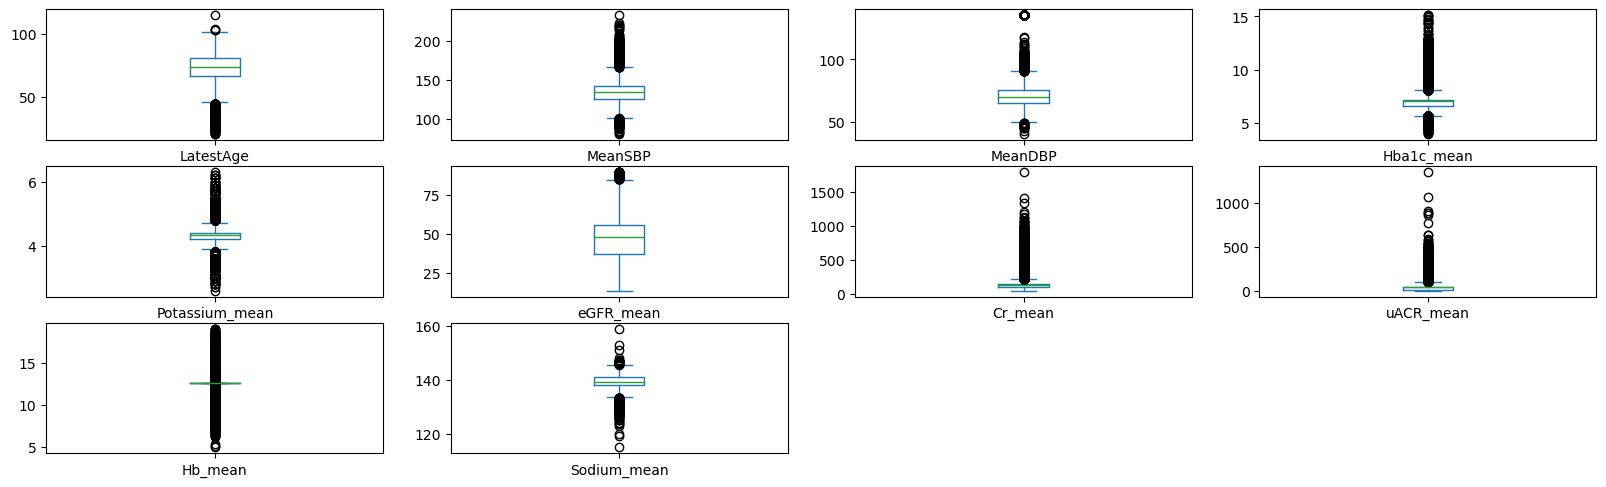

In [28]:
df.iloc[:,num_features].plot(kind = 'box', layout = (10, 4),subplots = True,sharex = False, figsize = (20,20))
plt.show

In [29]:
print(len(df[df['30% decline eGFR'] == 1]))
print(df.shape)

415
(21876, 33)


# EDA

In [30]:
# sns.set_theme()

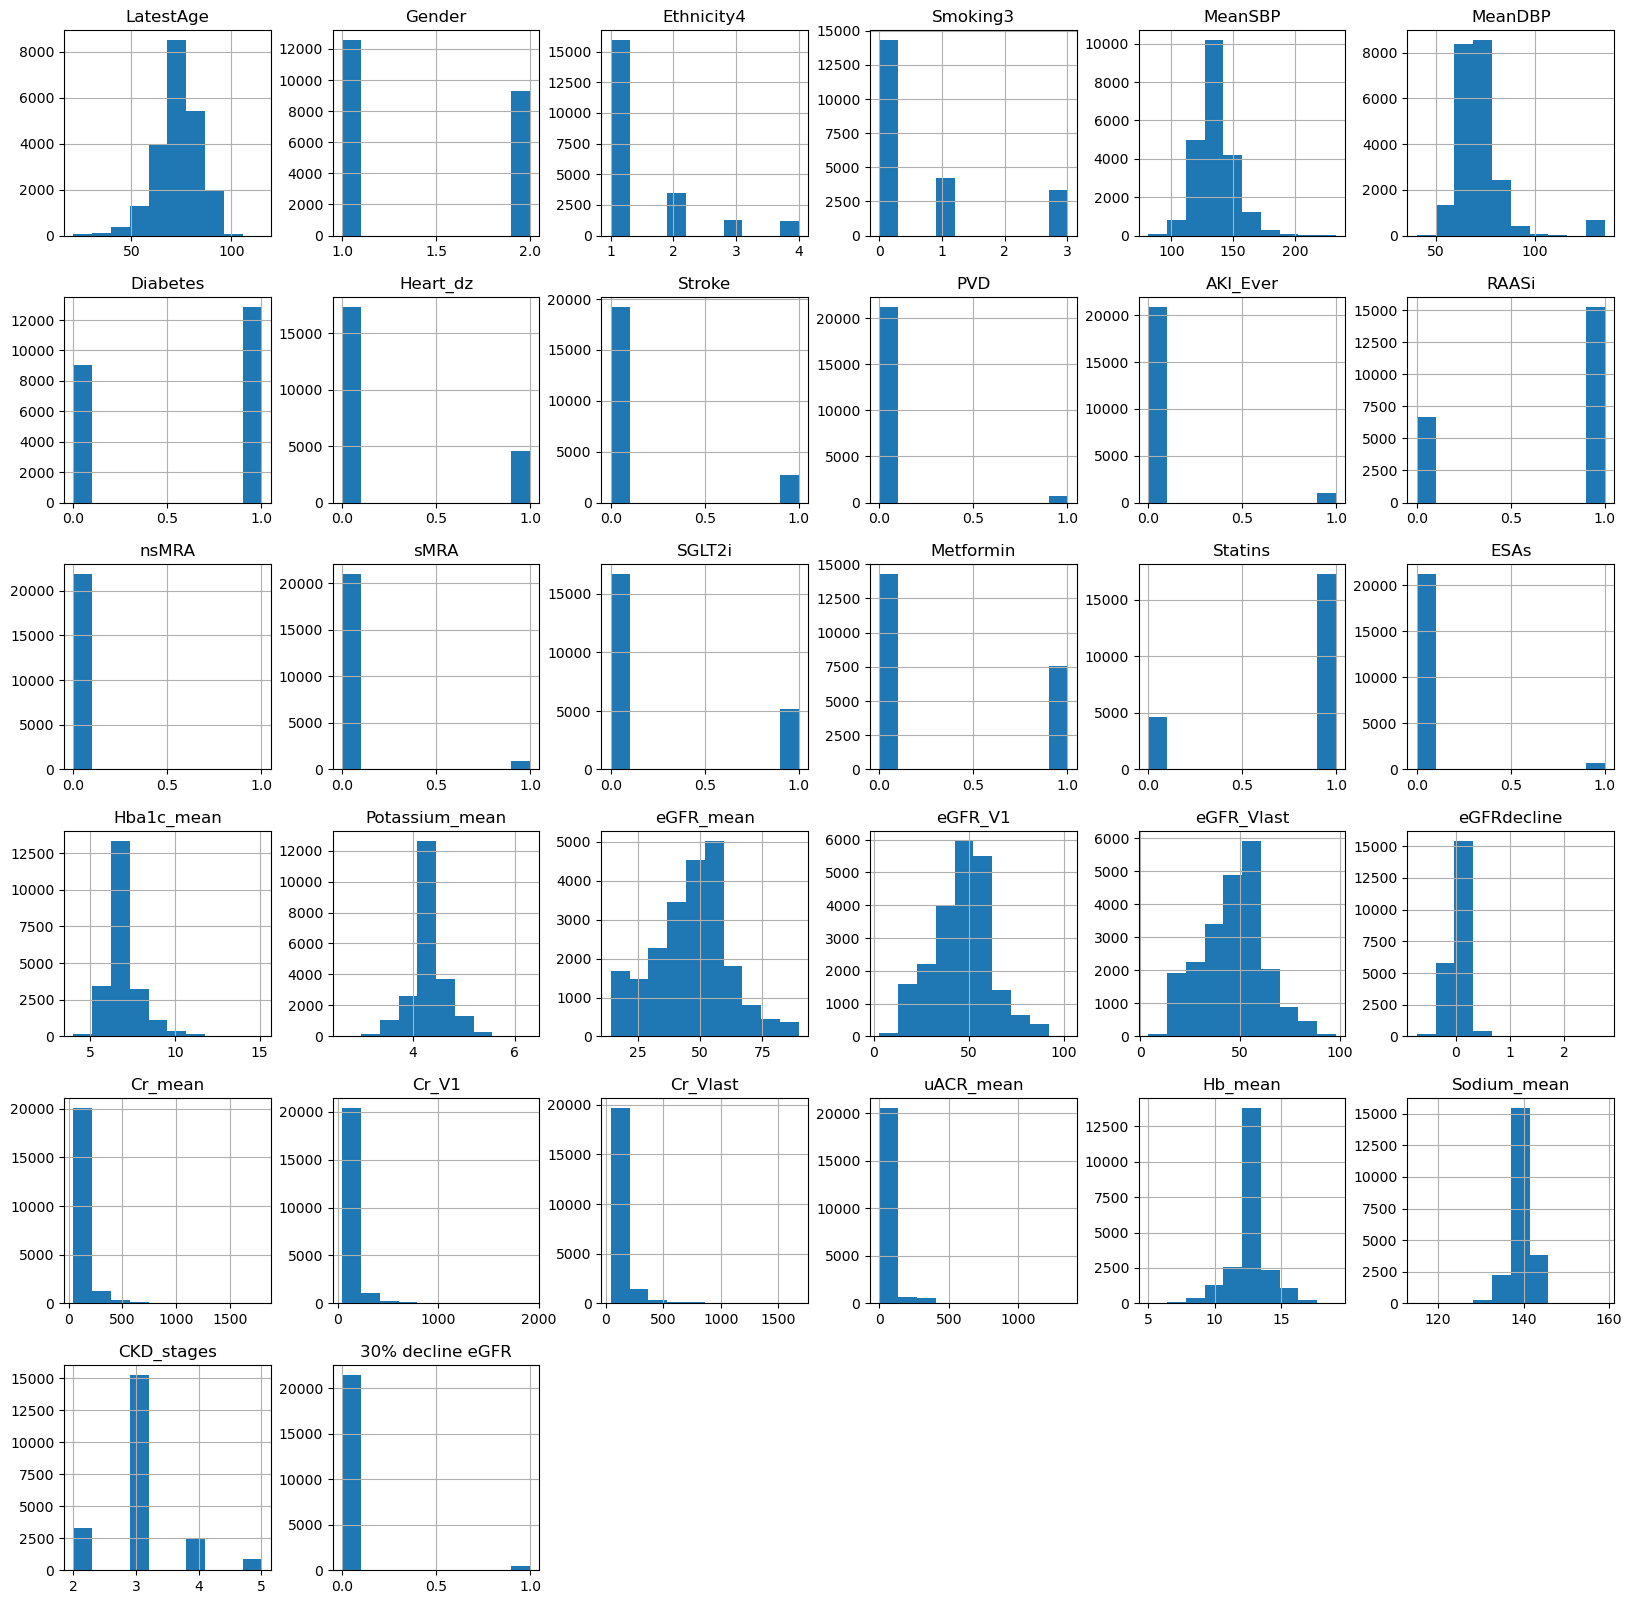

In [31]:
df.hist(figsize = (20,20))
plt.show()

In [32]:
df["30% decline eGFR"].value_counts()

0    21461
1      415
Name: 30% decline eGFR, dtype: int64

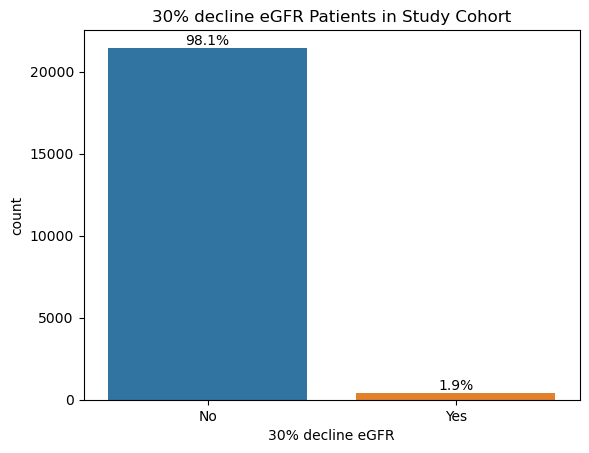

In [33]:
# check target label


ax= sns.countplot( data = df, x = "30% decline eGFR", order = [0,1])

# Total number of data points
total = len(df['30% decline eGFR'])

# Count the occurrences of each category
counts = [21461, 415]

# Calculate percentages
percentages = [100 * count / total for count in counts]

# Add percentages above the bars
for i, p in enumerate(ax.patches):
    # Place the text on the top center of the bar
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:1.1f}%'.format(percentages[i]), ha="center", va="bottom") 
    

plt.title("30% decline eGFR Patients in Study Cohort")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.show()

In [34]:
df["Diabetes"].value_counts()

1    12855
0     9021
Name: Diabetes, dtype: int64

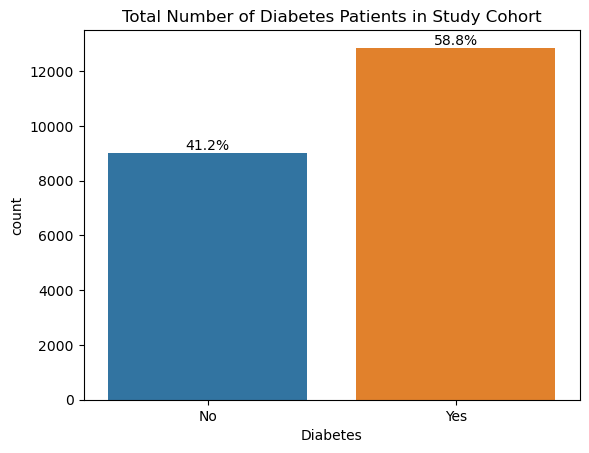

In [35]:
ax = sns.countplot(data=df, x="Diabetes", order=[0, 1])

# Total number of data points
total = len(df['Diabetes'])

# Count the occurrences of each category
counts = [9021, 12855]

# Calculate percentages
percentages = [100 * count / total for count in counts]

# Add percentages above the bars
for i, p in enumerate(ax.patches):
    # Place the text on the top center of the bar
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:1.1f}%'.format(percentages[i]), ha="center", va="bottom") 

plt.title("Total Number of Diabetes Patients in Study Cohort")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.show()

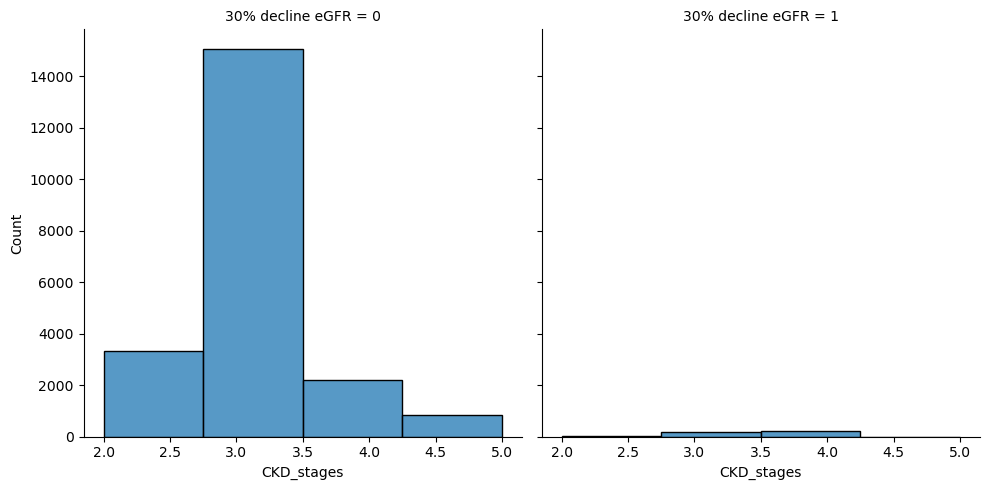

In [36]:
# CKD stage and 30% declined eGFR

sns.displot(data = df, x = "CKD_stages", col = "30% decline eGFR", bins = 4)

([<matplotlib.axis.XTick at 0x23ef5111310>,
 [Text(2, 0, 'Stage 2'),
  Text(3, 0, 'Stage 3'),
  Text(4, 0, 'Stage 4'),
  Text(5, 0, 'Stage 5')])

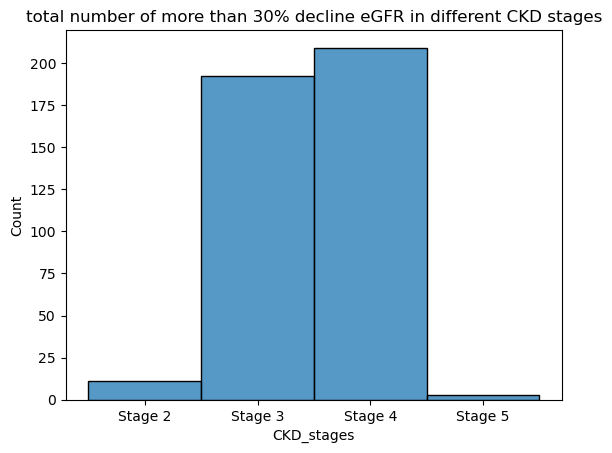

In [37]:
df_30decline = df[df["30% decline eGFR"] ==1 ]
df_30decline["CKD_stages"] = df_30decline["CKD_stages"].astype("category")

sns.histplot(data=df_30decline, x="CKD_stages")

plt.title("total number of more than 30% decline eGFR in different CKD stages")
plt.xticks(ticks=[2, 3, 4, 5], labels=['Stage 2', 'Stage 3', 'Stage 4', 'Stage 5'])

In [38]:
df_30decline["Diabetes"].value_counts()

1    308
0    107
Name: Diabetes, dtype: int64

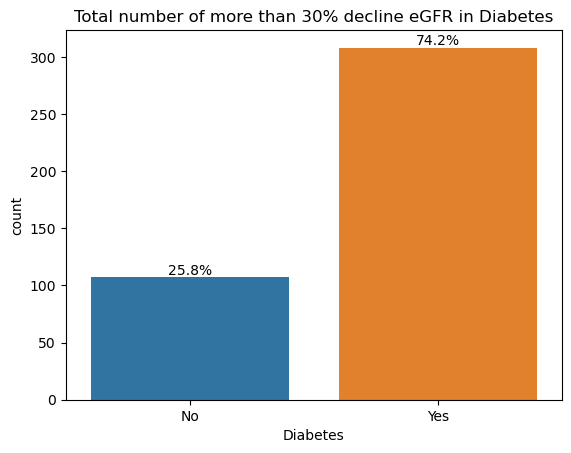

In [39]:

ax = sns.countplot(data=df_30decline, x="Diabetes", order=[0, 1])

# Total number of data points
total = len(df_30decline['Diabetes'])

# Count the occurrences of each category
counts = [107, 308]

# Calculate percentages
percentages = [100 * count / total for count in counts]

# Add percentages above the bars
for i, p in enumerate(ax.patches):
    # Place the text on the top center of the bar
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:1.1f}%'.format(percentages[i]), ha="center", va="bottom") 

plt.title("Total number of more than 30% decline eGFR in Diabetes")
plt.xticks(ticks=[0,1], labels=["No", "Yes"])
plt.show()

Text(0.5, 1.0, 'Race vs Gender')

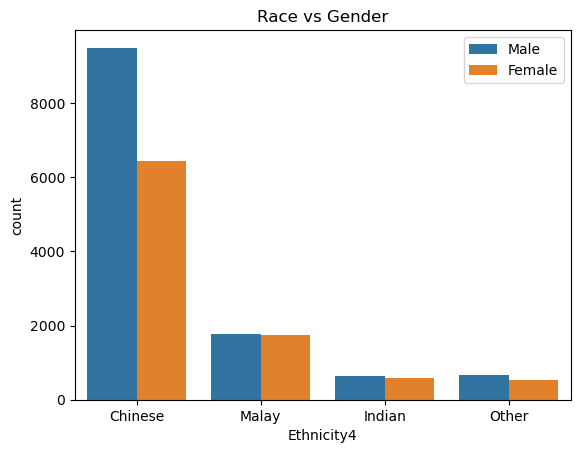

In [40]:
# Ethnicity and Gender
sns.countplot(data = df, x = "Ethnicity4", hue = "Gender")
plt.xticks(ticks=[0,1,2,3], labels=["Chinese", "Malay", "Indian", "Other"])
plt.legend(["Male", "Female"])

plt.title("Race vs Gender")

hypertension: 7344
MeanSBP_max : 233.0
MeanDBP_max : 135.18993063931256


Text(0.5, 1.0, 'Race vs Diabetes in Hypertension population')

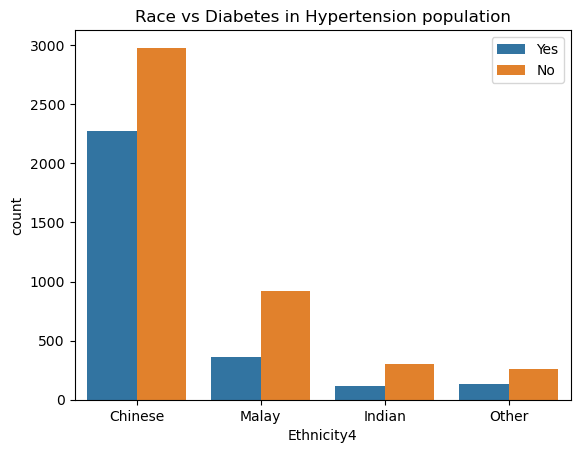

In [41]:
filtered_df = df[(df["MeanSBP"] > 140) | (df["MeanDBP"] > 90)]
print("hypertension:", len(filtered_df))
print("MeanSBP_max :", df["MeanSBP"].max())
print("MeanDBP_max :", df["MeanDBP"].max())

# Ethnicity and Gender
sns.countplot(data = filtered_df, x = "Ethnicity4", hue = "Diabetes")
plt.xticks(ticks=[0,1,2,3], labels=["Chinese", "Malay", "Indian", "Other"])
plt.legend(["Yes", "No"])

plt.title("Race vs Diabetes in Hypertension population")

In [42]:
filtered_df = df_30decline[(df_30decline["MeanSBP"] > 140) | (df_30decline["MeanDBP"] > 90)]
print("MeanSBP>140:", (df_30decline["MeanSBP"] > 140).sum())
print("MeanDBP >90", (df_30decline["MeanDBP"] > 90).sum())

MeanSBP>140: 205
MeanDBP >90 15


Text(0.5, 1.0, 'Blood pressure in >30% decline in eGFR')

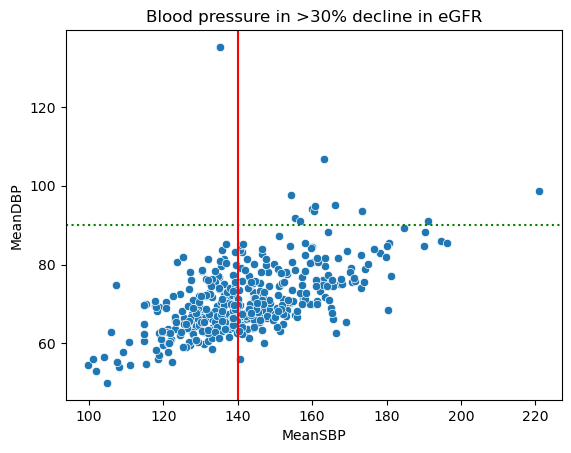

In [43]:
#Hypertension in >30% decline in eGFR

sns.scatterplot(data = df_30decline, x = "MeanSBP", y = "MeanDBP")

plt.axhline(y=90, color='g', linestyle='dotted')  # Horizontal line at y=90
plt.axvline(x=140, color='r', linestyle='-')  # Vertical line at x=140

plt.title("Blood pressure in >30% decline in eGFR")

<Axes: xlabel='Diabetes', ylabel='Hba1c_mean'>

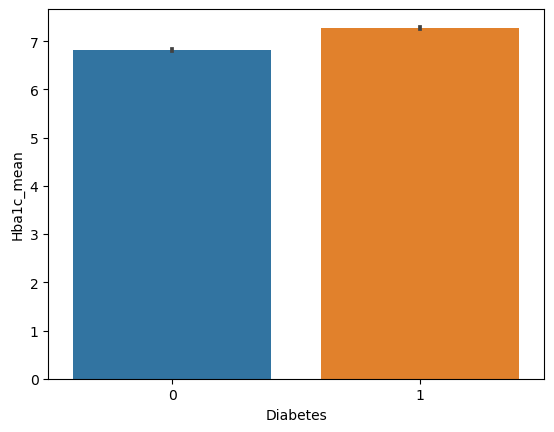

In [44]:
sns.barplot(data=df, x='Diabetes', y='Hba1c_mean')
# plt.xticks("Yes", "No")

<Axes: xlabel='LatestAge', ylabel='eGFR_mean'>

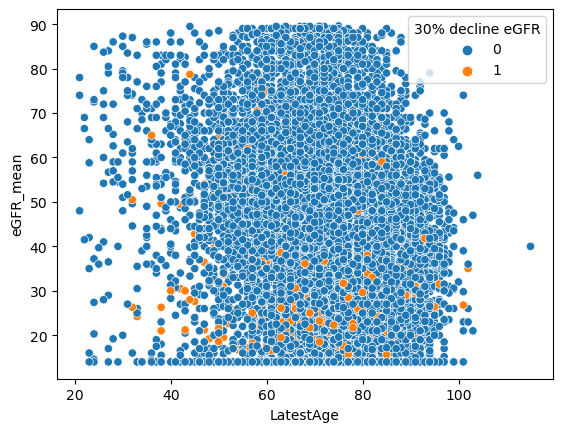

In [45]:
sns.scatterplot(data = df, x = "LatestAge", y = "eGFR_mean", hue = "30% decline eGFR")

Text(0.5, 1.0, ' MeanSBP vs eGFR in Hypertension ')

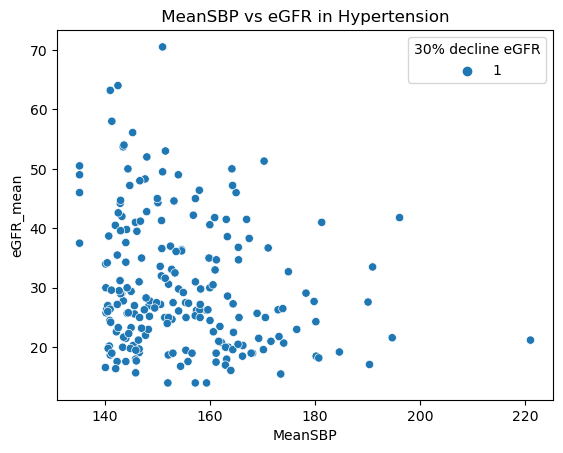

In [46]:
sns.scatterplot(data = filtered_df, x = "MeanSBP", y = "eGFR_mean", hue = "30% decline eGFR")
plt.title(" MeanSBP vs eGFR in Hypertension ")

Text(0.5, 1.0, ' MeanDBP vs eGFR in Hypertension ')

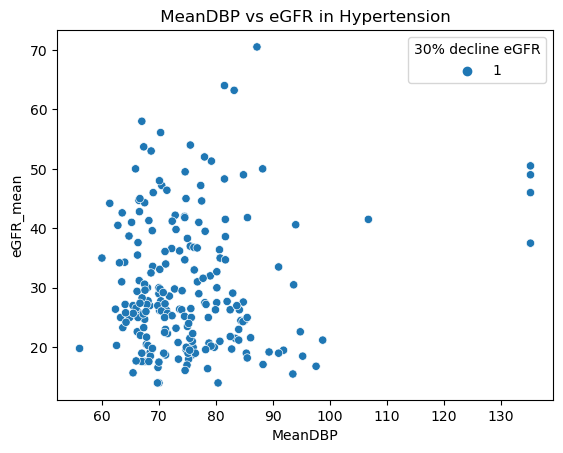

In [47]:
sns.scatterplot(data = filtered_df, x = "MeanDBP", y = "eGFR_mean", hue = "30% decline eGFR")
plt.title(" MeanDBP vs eGFR in Hypertension ")

In [48]:
df.corr().tail(1)

,LatestAge,Gender,Ethnicity4,Smoking3,MeanSBP,MeanDBP,Diabetes,Heart_dz,Stroke,PVD,...,eGFR_Vlast,eGFRdecline,Cr_mean,Cr_V1,Cr_Vlast,uACR_mean,Hb_mean,Sodium_mean,CKD_stages,30% decline eGFR
30% decline eGFR,-0.012793,0.017216,0.02383,-0.026778,0.063157,-0.007518,0.043656,0.027037,0.023062,0.028983,...,-0.192449,-0.39252,0.078707,0.011994,0.141319,0.156086,-0.082961,-0.02324,0.097843,1.0


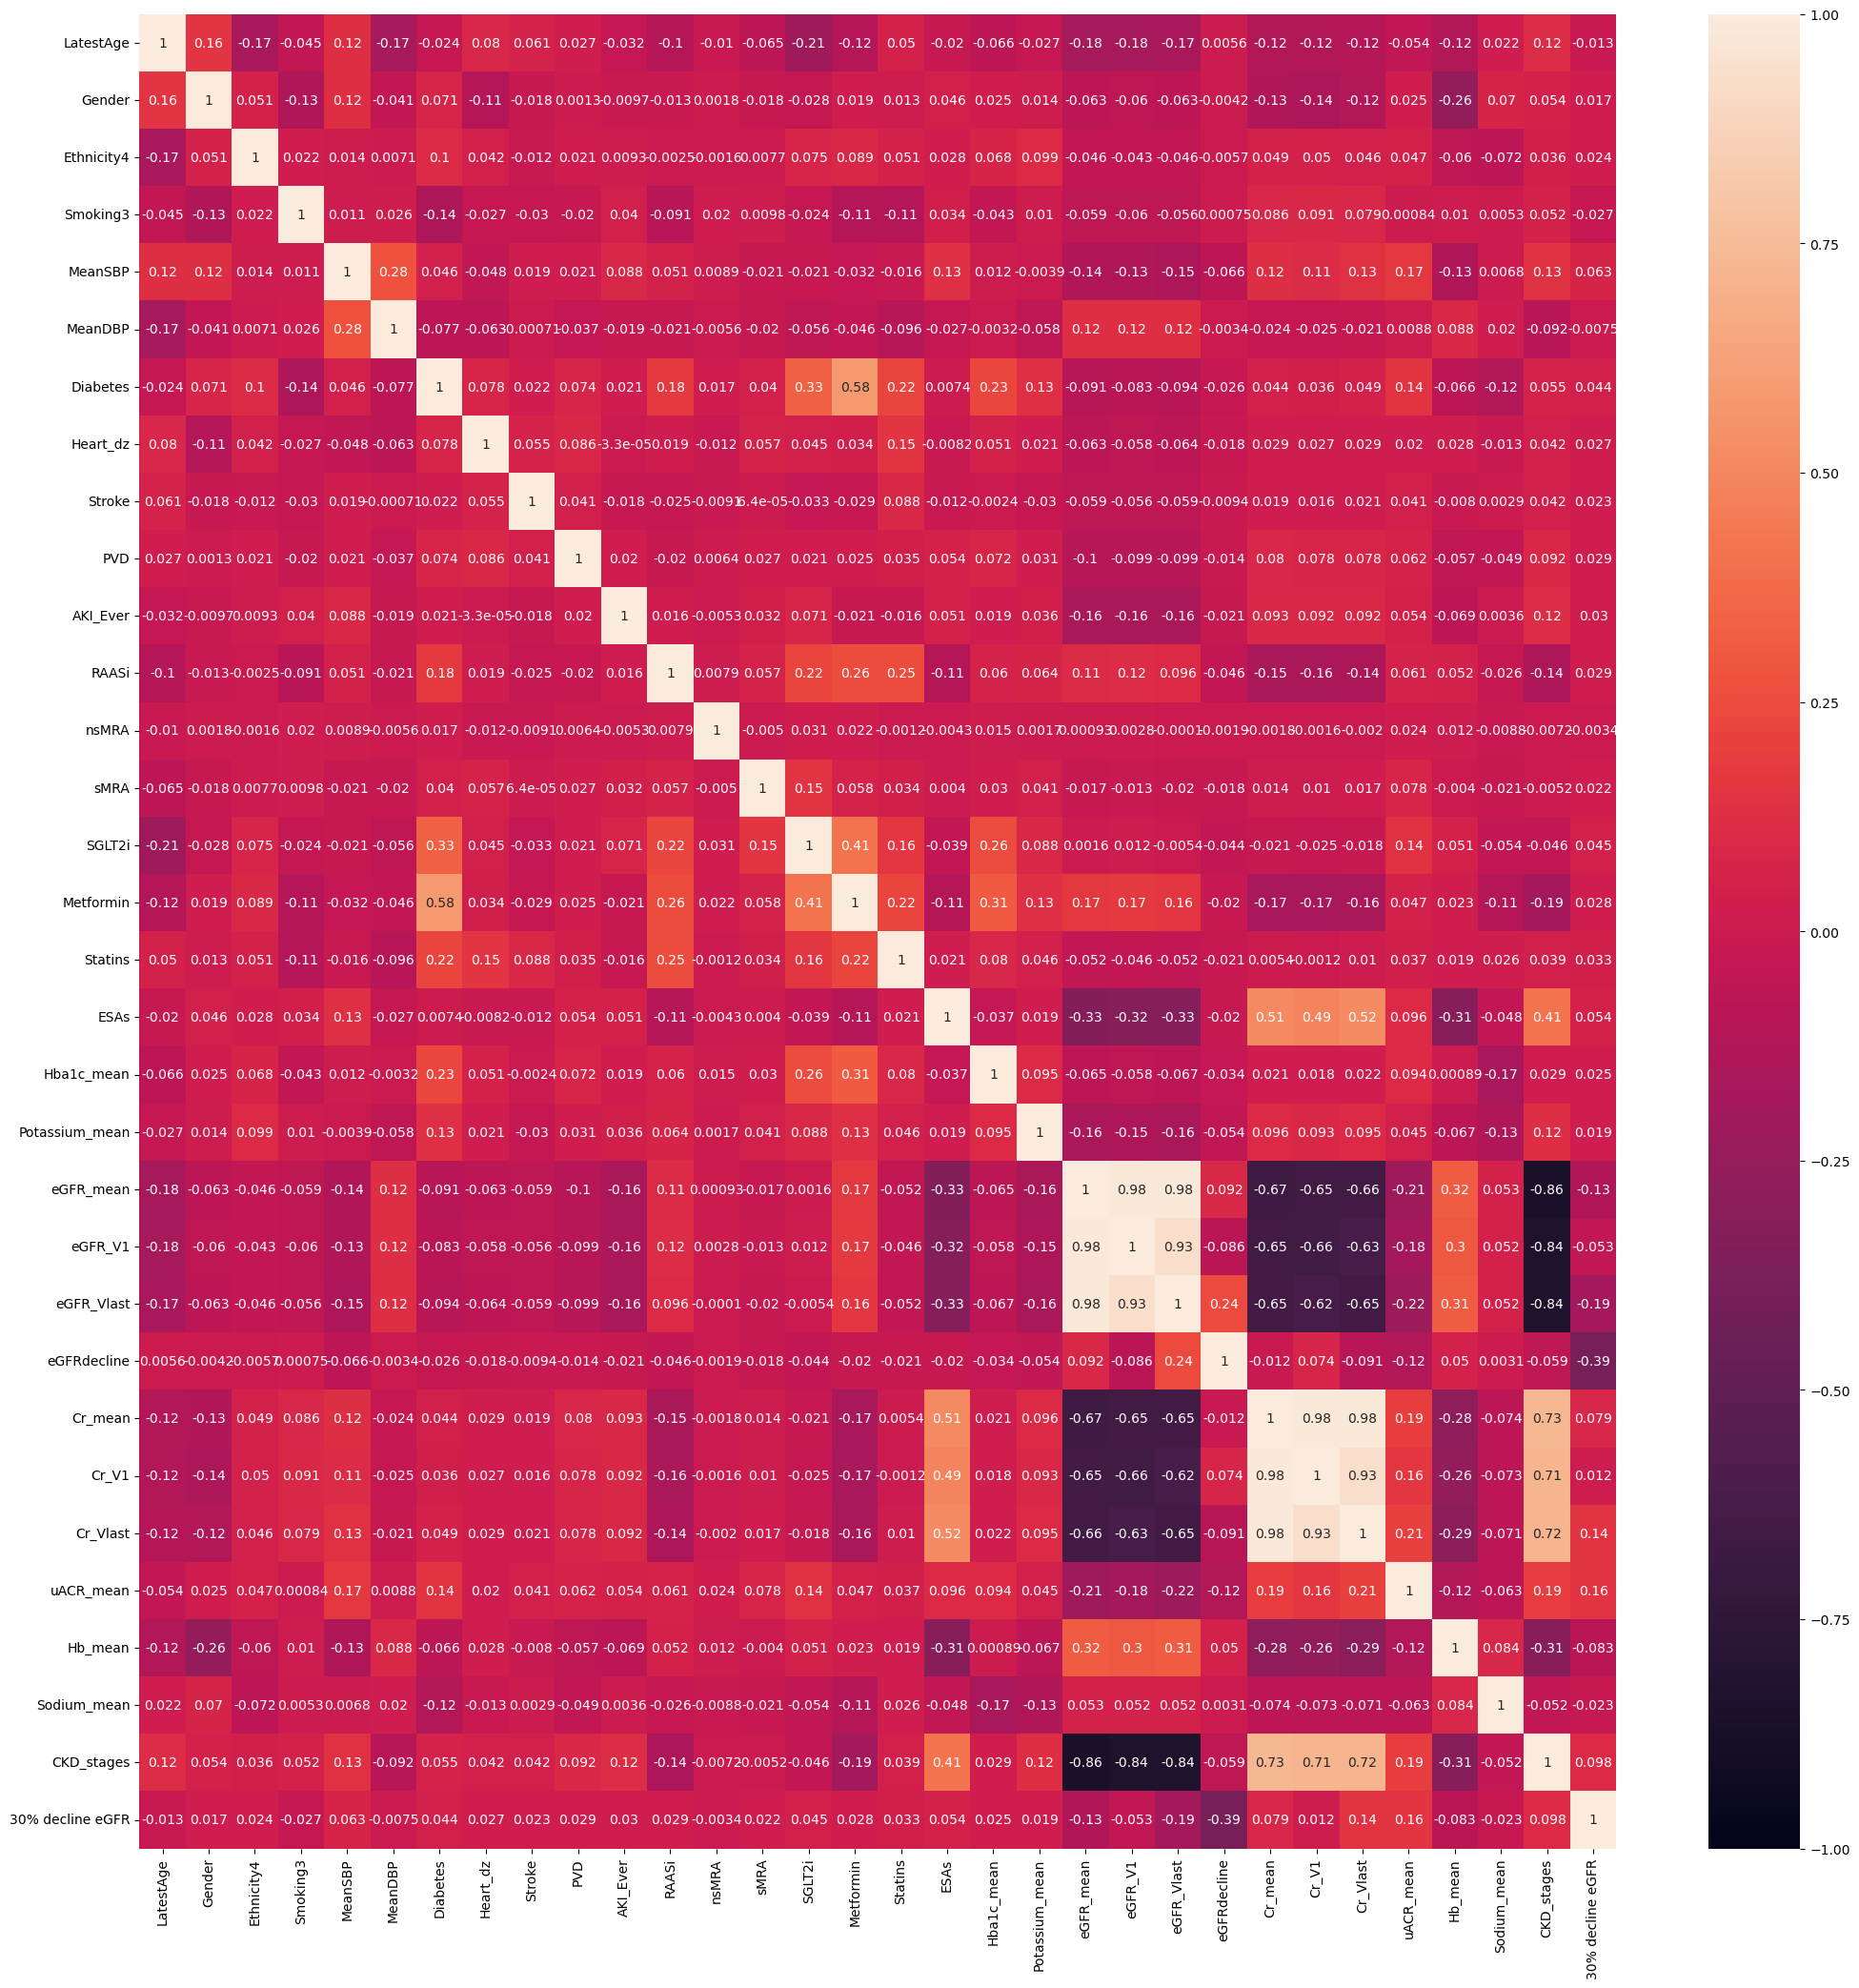

In [49]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.select_dtypes(include='number').corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [50]:
# remove those multicollinearity feature{'eGFR_V1','eGFR_Vlast','eGFRdecline',Cr_V1','Cr_Vlast','CKD_stage'}

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21876 entries, 1 to 30396
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pt_ID             21876 non-null  object 
 1   LatestAge         21876 non-null  int64  
 2   Gender            21876 non-null  int64  
 3   Ethnicity4        21876 non-null  int64  
 4   Smoking3          21876 non-null  int64  
 5   MeanSBP           21876 non-null  float64
 6   MeanDBP           21876 non-null  float64
 7   Diabetes          21876 non-null  int64  
 8   Heart_dz          21876 non-null  int64  
 9   Stroke            21876 non-null  int64  
 10  PVD               21876 non-null  int64  
 11  AKI_Ever          21876 non-null  int64  
 12  RAASi             21876 non-null  int64  
 13  nsMRA             21876 non-null  int64  
 14  sMRA              21876 non-null  int64  
 15  SGLT2i            21876 non-null  int64  
 16  Metformin         21876 non-null  int64 

# Split Train and Test set

In [52]:
X = df.drop(['30% decline eGFR','Pt_ID','eGFRdecline','eGFR_V1','eGFR_Vlast','eGFRdecline','Cr_V1','Cr_Vlast','CKD_stages'],axis=1)
Y = df['30% decline eGFR']
Y

1        0
2        0
3        1
4        0
5        0
        ..
30392    0
30393    0
30394    0
30395    1
30396    0
Name: 30% decline eGFR, Length: 21876, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label  = train_test_split(X,Y, test_size=0.20, random_state=46 ) 
print("train_data:", len(train_label))
print("train_label:", len(train_label))
print("test_data:", len(test_data))
print("test_label:", len(test_label))

train_data: 17500
train_label: 17500
test_data: 4376
test_label: 4376


In [54]:
# check the number of label 1 in train and test set 
print("train_label:",train_label.value_counts(), "percent :",len(train_label.value_counts())/len(train_label))
print("test_label: ",test_label.value_counts(),  "percent :", len(test_label.value_counts())/len(test_label))

train_label: 0    17153
1      347
Name: 30% decline eGFR, dtype: int64 percent : 0.00011428571428571428
test_label:  0    4308
1      68
Name: 30% decline eGFR, dtype: int64 percent : 0.0004570383912248629


# standardization

In [55]:
num_features = [0,4,5,18,19,20,21,22,23,24]
cat_features = [1,2,3,6,7,8,9,10,11,12,13,14,15,16,17]

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21876 entries, 1 to 30396
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LatestAge       21876 non-null  int64  
 1   Gender          21876 non-null  int64  
 2   Ethnicity4      21876 non-null  int64  
 3   Smoking3        21876 non-null  int64  
 4   MeanSBP         21876 non-null  float64
 5   MeanDBP         21876 non-null  float64
 6   Diabetes        21876 non-null  int64  
 7   Heart_dz        21876 non-null  int64  
 8   Stroke          21876 non-null  int64  
 9   PVD             21876 non-null  int64  
 10  AKI_Ever        21876 non-null  int64  
 11  RAASi           21876 non-null  int64  
 12  nsMRA           21876 non-null  int64  
 13  sMRA            21876 non-null  int64  
 14  SGLT2i          21876 non-null  int64  
 15  Metformin       21876 non-null  int64  
 16  Statins         21876 non-null  int64  
 17  ESAs            21876 non-null 

In [117]:
from sklearn.preprocessing import StandardScaler

# # Initializing the scaler
scaler = StandardScaler()

# scale for train set
num_scaled = scaler.fit_transform( train_data.iloc[:,num_features] )
num_scaled

num_prepro = pd.DataFrame(num_scaled, columns = train_data.iloc[:,num_features].columns)
num_prepro


train_data_cat =train_data.iloc[:,cat_features]
array_cat = train_data_cat.values
array_cat


data = np.hstack( (num_scaled, array_cat) )
data


train_data_scaled = pd.DataFrame(data,columns =['Age', 'SBP', 'DBP', 'Hba1c','Potassium','eGFR',
                                                'Serum Creatinine','uACR','Hb','Sodium','Gender', 'Ethnicity', 
                                         'Smoking', 'Diabetes', 'Heart disease', 'Stroke','PVD', 'AKI Ever', 'RAASi', 'nsMRA', 
                                         'sMRA', 'SGLT2i', 'Metformin','Statins', 'ESAs'])

train_data_scaled.shape

(17500, 25)

In [118]:
# scale for test set
num_scaled_test = scaler.fit_transform(test_data.iloc[:,num_features] )
num_scaled_test

num_prepro_test = pd.DataFrame(num_scaled_test, columns = test_data.iloc[:,num_features].columns)
num_prepro_test

test_data_cat =test_data.iloc[:,cat_features]
array_cat_test = test_data_cat.values
array_cat_test

data_test = np.hstack( (num_scaled_test, array_cat_test) )
data_test


test_data_scaled = pd.DataFrame(data_test,columns =['Age', 'SBP', 'DBP', 'Hba1c','Potassium','eGFR',
                                                'Serum Creatinine','uACR','Hb','Sodium','Gender', 'Ethnicity', 
                                         'Smoking', 'Diabetes', 'Heart disease', 'Stroke','PVD', 'AKI Ever', 'RAASi', 'nsMRA', 
                                         'sMRA', 'SGLT2i', 'Metformin','Statins', 'ESAs'])

test_data_scaled.shape

(4376, 25)

# Machine Learning_baseline

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve

DecisionTree

In [120]:
dtc = DecisionTreeClassifier (max_depth = 5, random_state = 46)
dtc.fit(train_data_scaled, train_label)

#compute predict on test and train dataset
test_predict = dtc.predict(test_data_scaled)
train_predict = dtc.predict(train_data_scaled)

# compare test and train accuracy _score
dtc_acc_test = accuracy_score(test_label, test_predict)
dtc_acc_train = accuracy_score(train_label, train_predict)


#compute AUC
y_score_dtc_ba = dtc.predict_proba(test_data_scaled)[:, 1]
fpr_dtc_ba, tpr_dtc_ba, thresholds_dtc_ba = roc_curve( test_label, y_score_dtc_ba)

dtc_auc_ba = roc_auc_score(test_label, test_predict)

# compute the precision,recall, f1
precision, recall, f1, _ = precision_recall_fscore_support(test_label, test_predict, average='binary', zero_division=0)


print("Accuracy score on test data on decision tree:",dtc_acc_test )
print("Accuracy score on train data on decision tree:",dtc_acc_train )
print("AUC on decision tree:", dtc_auc_ba)

print(f"Confusion Matrix :- \n{confusion_matrix(test_label,test_predict)}\n") #[TN, FP],[FN,TP]
print(f"Classification Report :- \n {classification_report(test_label, test_predict)}")


Accuracy score on test data on decision tree: 0.9835466179159049
Accuracy score on train data on decision tree: 0.9813142857142857
AUC on decision tree: 0.5067726254847343
Confusion Matrix :- 
[[4303    5]
 [  67    1]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4308
           1       0.17      0.01      0.03        68

    accuracy                           0.98      4376
   macro avg       0.58      0.51      0.51      4376
weighted avg       0.97      0.98      0.98      4376



Random Forest

In [121]:
rd_clf = RandomForestClassifier(random_state = 46)

rd_clf.fit(train_data_scaled, train_label)

# 'Random Forest__max_depth': 40, 'Random Forest__max_features': 'auto', 
#'Random Forest__min_samples_split': 2, 'Random Forest__n_estimators': 100

#compute predict on test and train dataset
test_predict = rd_clf.predict(test_data_scaled)
train_predict = rd_clf.predict(train_data_scaled)

# compare test and train accuracy _score
rd_clf_acc_test = accuracy_score(test_label, test_predict)
rd_clf_acc_train = accuracy_score(train_label, train_predict)


#compute AUC
y_score_rd_clf_ba = rd_clf.predict_proba(test_data_scaled)[:, 1]
fpr_rd_clf_ba, tpr_rd_clf_ba, thresholds_rd_clf_ba = roc_curve( test_label, y_score_rd_clf_ba)

rd_clf_auc_ba = roc_auc_score(test_label, test_predict)

# compute the precision,recall, f1
precision, recall, f1, _ = precision_recall_fscore_support(test_label, test_predict, average='binary', zero_division=0)

print("Accuracy score on test data on random forest:",rd_clf_acc_test )
print("Accuracy score on train data on random forest:",rd_clf_acc_train )
print("AUC on random forest:", rd_clf_auc_ba)

print(f"Confusion Matrix :- \n{confusion_matrix(test_label,test_predict)}\n")
print(f"Classification Report :- \n {classification_report(test_label, test_predict)}")

Accuracy score on test data on random forest: 0.9846892138939671
Accuracy score on train data on random forest: 1.0
AUC on random forest: 0.5073529411764706
Confusion Matrix :- 
[[4308    0]
 [  67    1]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4308
           1       1.00      0.01      0.03        68

    accuracy                           0.98      4376
   macro avg       0.99      0.51      0.51      4376
weighted avg       0.98      0.98      0.98      4376



SVC

In [122]:
svc = SVC(probability=True, random_state = 46)

svc.fit(train_data_scaled, train_label)

#compute predict on test and train dataset
test_predict = svc.predict(test_data_scaled)
train_predict = svc.predict(train_data_scaled)

# compare test and train accuracy _score
svc_acc_test = accuracy_score(test_label, test_predict)
svc_acc_train = accuracy_score(train_label, train_predict)

#compute AUC
y_score_svc_ba = svc.predict_proba(test_data_scaled)[:, 1]
fpr_svc_ba, tpr_svc_ba, thresholds_svc_ba = roc_curve( test_label, y_score_svc_ba )
svc_auc_ba = roc_auc_score(test_label, test_predict)

# compute the precision,recall, f1
precision, recall, f1, _ = precision_recall_fscore_support(test_label, test_predict, average='binary', zero_division=0)

print("Accuracy score on test data on SVC:",svc_acc_test )
print("Accuracy score on train data on SVC:",svc_acc_train )
print("AUC on svc:", svc_auc_ba)

print(f"Confusion Matrix :- \n{confusion_matrix(test_label,test_predict)}\n")
print(f"Classification Report :- \n {classification_report(test_label, test_predict)}")

Accuracy score on test data on SVC: 0.9844606946983546
Accuracy score on train data on SVC: 0.9803428571428572
AUC on svc: 0.5
Confusion Matrix :- 
[[4308    0]
 [  68    0]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      4308
           1       0.00      0.00      0.00        68

    accuracy                           0.98      4376
   macro avg       0.49      0.50      0.50      4376
weighted avg       0.97      0.98      0.98      4376



XgBoost

In [123]:
xgb = XGBClassifier(random_state = 46)
xgb.fit(train_data_scaled, train_label)

#compute predict on test and train dataset
test_predict = xgb.predict(test_data_scaled)
train_predict = xgb.predict(train_data_scaled)

# compare test and train accuracy _score
xgb_acc_test = accuracy_score(test_label, test_predict)
xgb_acc_train = accuracy_score(train_label, train_predict)

#compute AUC
y_score_xgb_ba = xgb.predict_proba(test_data_scaled)[:, 1]
fpr_xgb_ba, tpr_xgb_ba, thresholds_xgb_ba = roc_curve( test_label, y_score_xgb_ba)

xgb_auc_ba = roc_auc_score(test_label, test_predict)

# compute the precision,recall, f1
precision, recall, f1, _ = precision_recall_fscore_support(test_label, test_predict, average='binary', zero_division=0)

print("Accuracy score on test data on XgBoost:",xgb_acc_test )
print("Accuracy score on train data on XgBoost:",xgb_acc_train )
print("AUC on XgBoost:", xgb_auc_ba)

print(f"Confusion Matrix :- \n{confusion_matrix(test_label,test_predict)}\n")
print(f"Classification Report :- \n {classification_report(test_label, test_predict)}")

Accuracy score on test data on XgBoost: 0.9849177330895795
Accuracy score on train data on XgBoost: 0.9996571428571429
AUC on XgBoost: 0.5291796384291879
Confusion Matrix :- 
[[4306    2]
 [  64    4]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4308
           1       0.67      0.06      0.11        68

    accuracy                           0.98      4376
   macro avg       0.83      0.53      0.55      4376
weighted avg       0.98      0.98      0.98      4376



In [124]:
models = pd.DataFrame({
    'Model' : ['Decision Tree Classifier', 'Random Forest Classifier', 'SVC', 'XgBoost'],
    'Test_Score' : [dtc_acc_test , rd_clf_acc_test,svc_acc_test, xgb_acc_test],
    'Train_Score' : [dtc_acc_train , rd_clf_acc_train,svc_acc_train, xgb_acc_train]
})


models.sort_values(by = 'Model', ascending = True)

,Model,Test_Score,Train_Score
0,Decision Tree Classifier,0.983547,0.981314
1,Random Forest Classifier,0.984689,1.000000
2,SVC,0.984461,0.980343
3,XgBoost,0.984918,0.999657


# Random searchCV +stratified_kfold =5 + SMOTE 
Random SearchCV is a powerful way to address overfitting issues by finding the optimal hyperparameters for models. Random SearchCV performs allowing to test a range of hyperparameters to find the best combination that minimizes overfitting and enhances the model's ability to generalize to unseen data.

In [125]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve

In [138]:
#decision Tree

# Defining the pipeline steps
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=46)),
    ('Decision Tree', DecisionTreeClassifier(random_state=46))
])

# cross validation
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=46)

# Defining the parameter grandom search
param_dist = {
    'Decision Tree__max_depth': [5,10, 20],
    'Decision Tree__min_samples_split': [1,5,10],
    'Decision Tree__min_samples_leaf': [1,4,10],
    'Decision Tree__max_features':[5,10]

}

# Setting up RandomizedSearchCV
dtc = RandomizedSearchCV(pipeline, param_distributions=param_dist,n_iter=10, cv=stratified_kfold, 
                         scoring='accuracy', n_jobs=-1,random_state=46)

# Fitting RandomizedSearchCV
dtc.fit(train_data_scaled, train_label)

cv_score = dtc.best_score_
test_score = dtc.score(test_data_scaled, test_label)

# Get the best estimator and make predictions
best_model = dtc.best_estimator_
test_predict = dtc.predict(test_data_scaled)
train_predict = dtc.predict(train_data_scaled)

# compare test and train accuracy _score
dtc_acc_test = accuracy_score(test_label, test_predict)
dtc_acc_train = accuracy_score(train_label, train_predict)


#compute AUC
y_score_dtc = dtc.predict_proba(test_data_scaled)[:, 1]
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve( test_label, y_score_dtc)

dtc_auc = roc_auc_score(test_label, test_predict)
dtc_cm = confusion_matrix(test_label,test_predict)

# compute the precision,recall, f1
# precision, recall, f1, _ = precision_recall_fscore_support(test_label, test_predict, average='binary', zero_division=0)

print("Best parameters:", dtc.best_params_)
print("Accuracy score on test data on decision tree:",dtc_acc_test )
print("Accuracy score on train data on decision tree:",dtc_acc_train )
print("AUC on decision tree:", dtc_auc)

print(f"Confusion Matrix :- \n{confusion_matrix(test_label,test_predict)}\n")

print(f"Classification Report :- \n {classification_report(test_label, test_predict)}")
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')


Best parameters: {'Decision Tree__min_samples_split': 10, 'Decision Tree__min_samples_leaf': 1, 'Decision Tree__max_features': 10, 'Decision Tree__max_depth': 20}
Accuracy score on test data on decision tree: 0.8845978062157221
Accuracy score on train data on decision tree: 0.9800571428571428
AUC on decision tree: 0.6084917253809602
Confusion Matrix :- 
[[3849  459]
 [  46   22]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      4308
           1       0.05      0.32      0.08        68

    accuracy                           0.88      4376
   macro avg       0.52      0.61      0.51      4376
weighted avg       0.97      0.88      0.93      4376

Cross-validation score: 0.9411428571428571
Test score: 0.8845978062157221


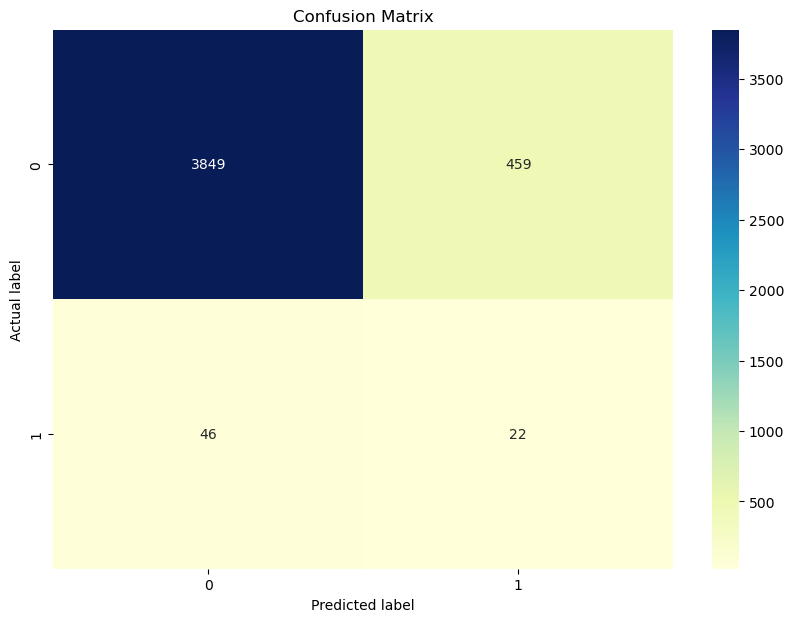

In [139]:
plt.figure(figsize=(10, 7))
sns.heatmap(dtc_cm, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [129]:
#random forest

# Defining the pipeline steps
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=46)),
    ('Random Forest', RandomForestClassifier(random_state=46))
])

# cross validation
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=46)

# Defining the parameter grid to search
param_dist = {
    'Random Forest__n_estimators': [50, 80, 100],
    'Random Forest__max_depth': [ 5,20, 30],
    'Random Forest__min_samples_split': [0.1, 0.5],
    'Random Forest__max_features': [30, 50]
}

# Setting up RandomizedSearchCV
rd_clf = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=stratified_kfold, 
                            scoring='accuracy', n_jobs=-1,random_state=46)

rd_clf.fit(train_data_scaled, train_label)

cv_score = rd_clf.best_score_
test_score = rd_clf.score(test_data_scaled, test_label)

# Get the best estimator and make predictions
best_model = rd_clf.best_estimator_
test_predict = rd_clf.predict(test_data_scaled)
train_predict = rd_clf.predict(train_data_scaled)

# compare test and train accuracy _score
rd_clf_acc_test = accuracy_score(test_label, test_predict)
rd_clf_acc_train = accuracy_score(train_label, train_predict)


#compute AUC
y_score_rd_clf = rd_clf.predict_proba(test_data_scaled)[:, 1]
fpr_rd_clf, tpr_rd_clf, thresholds_rd_clf = roc_curve( test_label, y_score_rd_clf  )

rd_clf_auc = roc_auc_score(test_label, test_predict)
rd_clf_cm = confusion_matrix(test_label,test_predict)

# compute the precision,recall, f1
# precision, recall, f1, _ = precision_recall_fscore_support(test_label, test_predict, average='binary', zero_division=0)

print("Best parameters:", rd_clf.best_params_)
print("Accuracy score on test data on random forest:",rd_clf_acc_test )
print("Accuracy score on train data on random forest:",rd_clf_acc_train )
print("AUC on random forest:", rd_clf_auc)

print(f"Confusion Matrix :- \n{confusion_matrix(test_label,test_predict)}\n")
print(f"Classification Report :- \n {classification_report(test_label, test_predict)}")

print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Best parameters: {'Random Forest__n_estimators': 50, 'Random Forest__min_samples_split': 0.1, 'Random Forest__max_features': 30, 'Random Forest__max_depth': 20}
Accuracy score on test data on random forest: 0.8615173674588665
Accuracy score on train data on random forest: 0.8616571428571429
AUC on random forest: 0.6401906166366268
Confusion Matrix :- 
[[3742  566]
 [  40   28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93      4308
           1       0.05      0.41      0.08        68

    accuracy                           0.86      4376
   macro avg       0.52      0.64      0.50      4376
weighted avg       0.97      0.86      0.91      4376

Cross-validation score: 0.8484
Test score: 0.8615173674588665


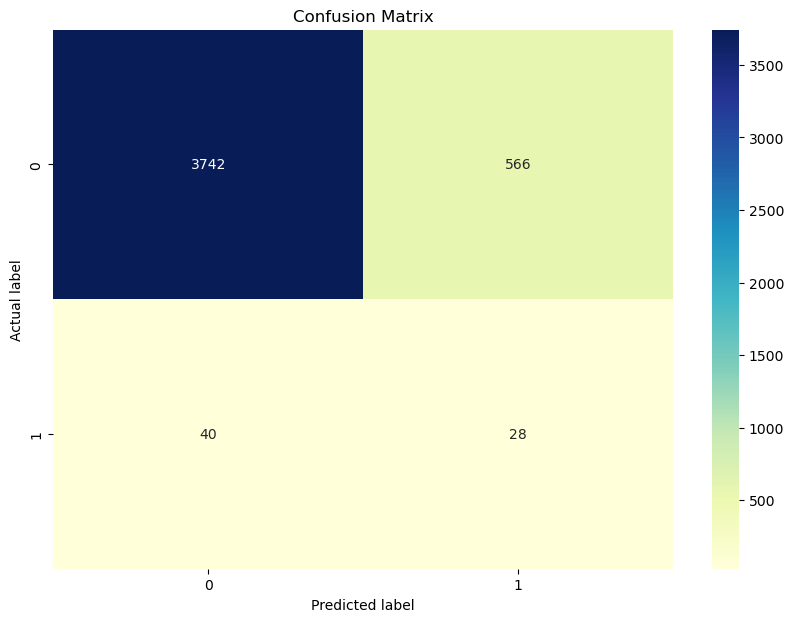

In [130]:
plt.figure(figsize=(10, 7))
sns.heatmap(rd_clf_cm, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [131]:
# # SVC

#  Defining the pipeline steps
pipeline = ImbPipeline([
     ('smote', SMOTE(random_state=46)),
     ('svc', SVC(probability=True, random_state=46))
 ])

 # cross validation
stratified_kfold = StratifiedKFold(n_splits=5,
                                        shuffle=True,
                                        random_state=46)

 # Defining the parameter grid to search
param_dist = {
    'svc__C':[0.1,1],# 0.5
     'svc__gamma': ['auto'],
     'svc__kernel':['rbf'] #linear
 }

 # Setting up GridSearchCV
svc = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=stratified_kfold, 
                         scoring='accuracy', n_jobs=-1,random_state=46)

svc.fit(train_data_scaled, train_label)
cv_score = rd_clf.best_score_
test_score = rd_clf.score(test_data_scaled, test_label)

# Get the best estimator and make predictions
best_model = svc.best_estimator_
test_predict = svc.predict(test_data_scaled)
train_predict = svc.predict(train_data_scaled)

# compare test and train accuracy _score
svc_acc_test = accuracy_score(test_label, test_predict)
svc_acc_train = accuracy_score(train_label, train_predict)


# compute AUC
y_score_svc = svc.predict_proba(test_data_scaled)[:, 1]
fpr_svc, tpr_svc, thresholds_svc = roc_curve( test_label, y_score_svc  )

svc_auc = roc_auc_score(test_label, test_predict)
svc_cm = confusion_matrix(test_label,test_predict)

# compute the precision,recall, f1
# precision, recall, f1, _ = precision_recall_fscore_support(test_label, test_predict, average='binary', zero_division=0)

print("Best parameters:", svc.best_params_)
print("Accuracy score on test data on SVC:",svc_acc_test )
print("Accuracy score on train data on SCV:",svc_acc_train )
print("AUC on SVC:", svc_auc)

print(f"Confusion Matrix :- \n{confusion_matrix(test_label,test_predict)}\n")
print(f"Classification Report :- \n {classification_report(test_label, test_predict)}")
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Best parameters: {'svc__kernel': 'rbf', 'svc__gamma': 'auto', 'svc__C': 1}
Accuracy score on test data on SVC: 0.9245886654478976
Accuracy score on train data on SCV: 0.9201142857142857
AUC on SVC: 0.6360396526298543
Confusion Matrix :- 
[[4023  285]
 [  45   23]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      4308
           1       0.07      0.34      0.12        68

    accuracy                           0.92      4376
   macro avg       0.53      0.64      0.54      4376
weighted avg       0.97      0.92      0.95      4376

Cross-validation score: 0.8484
Test score: 0.8615173674588665


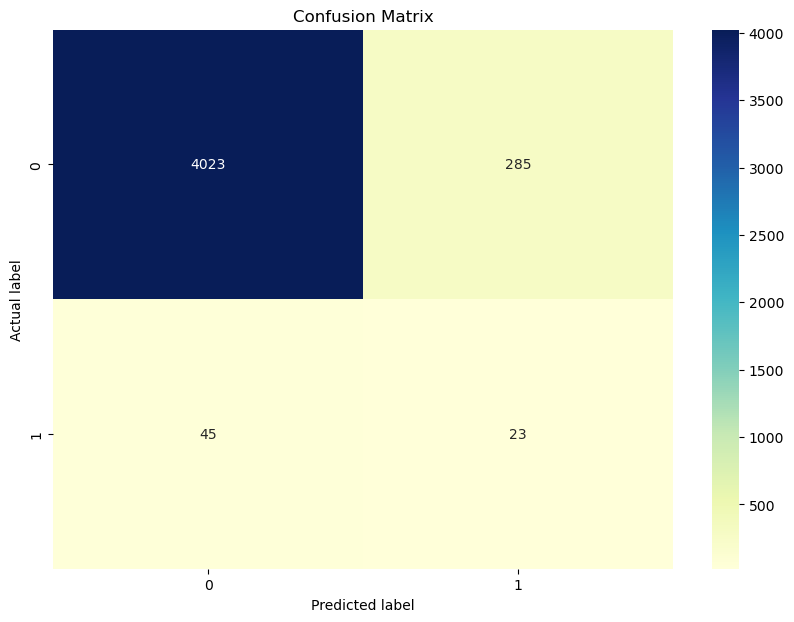

In [132]:
plt.figure(figsize=(10, 7))
sns.heatmap(svc_cm, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [133]:
#  XGBoost

# Defining the pipeline steps
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=46)),
    ('xgb', XGBClassifier(random_state=46))
])

# cross validation
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=46)


# Defining the parameter to search
param_dist = {
    'xgb__n_estimators': [100,200],
    'xgb__max_depth': [2,4,6],
    'xgb__learning_rate': [ 0.01, 0.03],
    "xgb__subsample":[1,3],
    "xgb__min_child_weight":[1],
    "xgb__gamma":[0],
    "xgb__max_delta_step":[0],
    "xgb__sampling_method":["uniform"],
    "xgb__colsample_bytree":[0.8, 3]
    
}


# Setting up RandomizedSearchCV
xgb = RandomizedSearchCV(pipeline,  param_distributions=param_dist, n_iter=10, cv=stratified_kfold, scoring='accuracy', n_jobs=-1,random_state=46)

xgb.fit(train_data_scaled, train_label)

cv_score = xgb.best_score_
test_score = xgb.score(test_data_scaled, test_label)


# Get the best estimator and make predictions
best_model = xgb.best_estimator_
test_predict = xgb.predict(test_data_scaled)
train_predict = xgb.predict(train_data_scaled)

# compare test and train accuracy _score
xgb_acc_test = accuracy_score(test_label, test_predict)
xgb_acc_train = accuracy_score(train_label, train_predict)


#compute AUC
y_score_xgb = xgb.predict_proba(test_data_scaled)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve( test_label, y_score_xgb)

xgb_auc = roc_auc_score(test_label, test_predict)
xgb_cm = confusion_matrix(test_label,test_predict)


# compute the precision,recall, f1
# precision, recall, f1, _ = precision_recall_fscore_support(test_label, test_predict, average='binary', zero_division=0)

print("Best parameters:", xgb.best_params_)
print("Accuracy score on test data on xgb:",xgb_acc_test )
print("Accuracy score on train data on xgb:",xgb_acc_train )
print("AUC on xgb:", xgb_auc)

print(f"Confusion Matrix :- \n{confusion_matrix(test_label,test_predict)}\n")
print(f"Classification Report :- \n {classification_report(test_label, test_predict)}")

print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Best parameters: {'xgb__subsample': 1, 'xgb__sampling_method': 'uniform', 'xgb__n_estimators': 200, 'xgb__min_child_weight': 1, 'xgb__max_depth': 6, 'xgb__max_delta_step': 0, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.8}
Accuracy score on test data on xgb: 0.9058500914076782
Accuracy score on train data on xgb: 0.9334857142857143
AUC on xgb: 0.6771806215522421
Confusion Matrix :- 
[[3934  374]
 [  38   30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      4308
           1       0.07      0.44      0.13        68

    accuracy                           0.91      4376
   macro avg       0.53      0.68      0.54      4376
weighted avg       0.98      0.91      0.94      4376

Cross-validation score: 0.9298285714285714
Test score: 0.9058500914076782


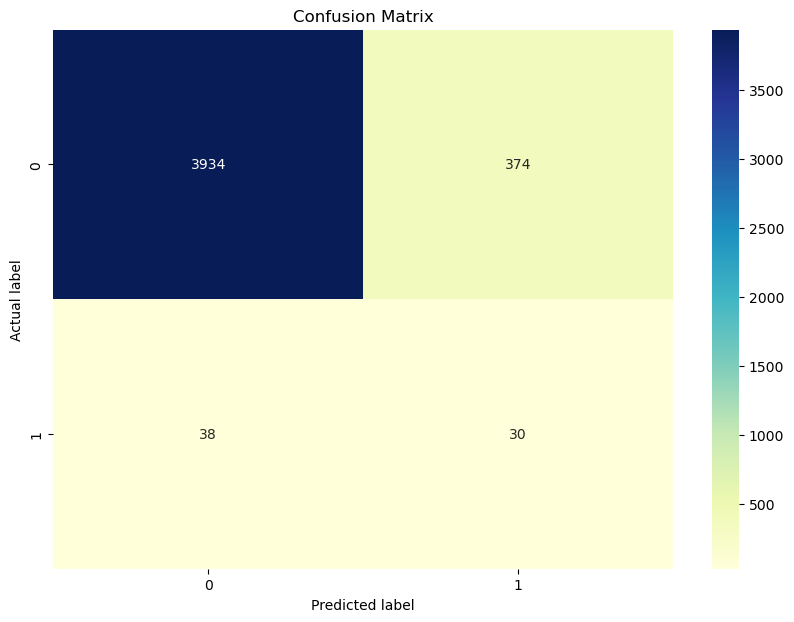

In [134]:
plt.figure(figsize=(10, 7))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# AUROC- Baseline

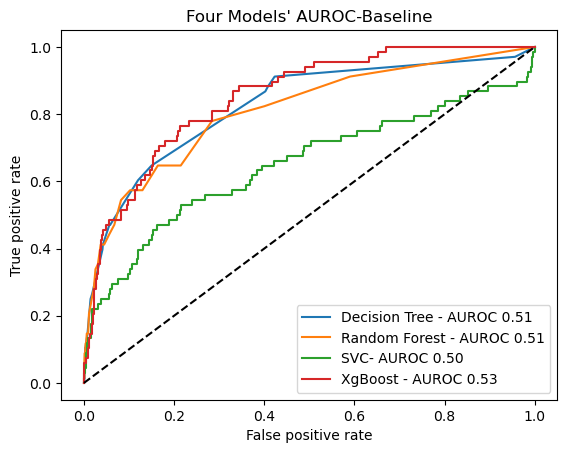

In [135]:
fig, ax = plt.subplots()

# Decision Tree
ax.plot( fpr_dtc_ba, tpr_dtc_ba )

# Random Forest
ax.plot( fpr_rd_clf_ba, tpr_rd_clf_ba )

# # SVC
ax.plot( fpr_svc_ba, tpr_svc_ba)

# XGBoost
ax.plot( fpr_xgb_ba, tpr_xgb_ba)

# Add a diagonal dashed line
ax.plot([0, 1], [0, 1], 'k--')

ax.set_title("Four Models' AUROC-Baseline")
ax.set_xlabel( 'False positive rate' )
ax.set_ylabel( 'True positive rate' )
ax.legend(
    [
        'Decision Tree - AUROC {:.2f}'.format(dtc_auc_ba),
        'Random Forest - AUROC {:.2f}'.format(rd_clf_auc_ba),
        'SVC- AUROC {:.2f}'.format(svc_auc_ba),
        'XgBoost - AUROC {:.2f}'.format(xgb_auc_ba),
    ]
)

plt.show()

# AUROC- SMOTE

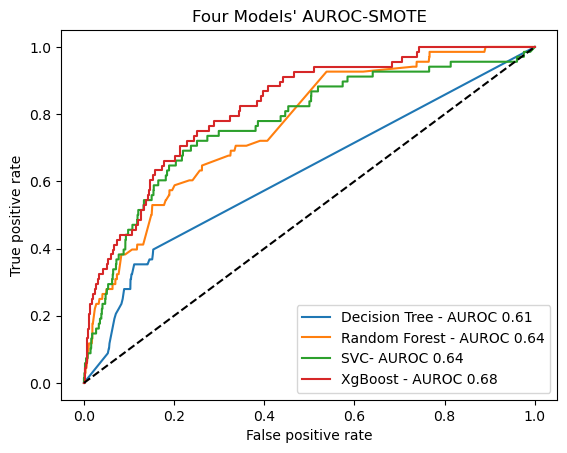

In [140]:
fig, ax = plt.subplots()

# Decision Tree
ax.plot( fpr_dtc, tpr_dtc )

# Random Forest
ax.plot( fpr_rd_clf, tpr_rd_clf )

# # SVC
ax.plot( fpr_svc, tpr_svc)

# XGBoost
ax.plot( fpr_xgb, tpr_xgb )

# Add a diagonal dashed line
ax.plot([0, 1], [0, 1], 'k--')

ax.set_title("Four Models' AUROC-SMOTE")
ax.set_xlabel( 'False positive rate' )
ax.set_ylabel( 'True positive rate' )
ax.legend(
    [
        'Decision Tree - AUROC {:.2f}'.format(dtc_auc),
        'Random Forest - AUROC {:.2f}'.format(rd_clf_auc),
        'SVC- AUROC {:.2f}'.format(svc_auc),
        'XgBoost - AUROC {:.2f}'.format(xgb_auc),
    ]
)

plt.show()

# Feature importance - SHAP 

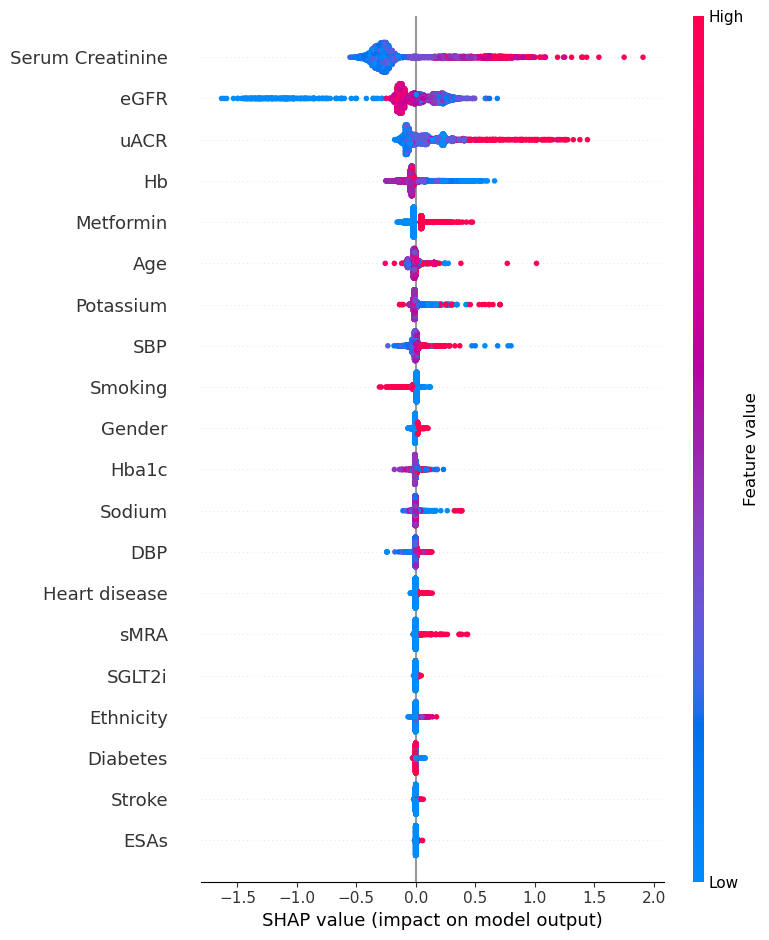

In [137]:
import shap
import matplotlib.pyplot as plt

# XGBoost

xgb = XGBClassifier(random_state=46, gamma= 0, learning_rate=0.01,max_delta_step= 0, max_depth= 6, 
                    min_child_weight= 1, n_estimators= 200, sampling_method= 'uniform', subsample= 1)

xgb.fit(train_data_scaled, train_label)

explainer = shap.Explainer(xgb)
shap_values = explainer.shap_values(test_data_scaled)

plt.figure(figsize=(6, 4))
shap.summary_plot(shap_values, test_data_scaled,max_display = 20)

plt.show()